In [1]:
dataset_path = "/content/drive/MyDrive/Kelompok AI/TB/healthcare-dataset-stroke-data.csv.xls"

## 1. Data Gathering


### Import library yang diperlukan


In [2]:
# Library untuk memproses dan visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import roc_curve, auc

### Data Gathering: Memuat dataset yang diambil dari kaggle


In [3]:
data = pd.read_csv(dataset_path)

In [4]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
print(data.head(10))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private    

## 2. Data Preprocessing


### Data Understanding


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
print(data.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [9]:
print("Unique value of gender: ", data["gender"].unique())
print("Unique value of Married status: ", data["ever_married"].unique())
print("Unique value of Stroke status: ", data["stroke"].unique())

Unique value of gender:  ['Male' 'Female' 'Other']
Unique value of Married status:  ['Yes' 'No']
Unique value of Stroke status:  [1 0]


In [10]:
print(data["gender"].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [11]:
print(data["stroke"].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


In [12]:
print(data["ever_married"].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


In [13]:
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [14]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

/tmp/ipython-input-14-1997496975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


### Exploratory Data Analysis (EDA)


#### Plot histogram untuk kolom numerik


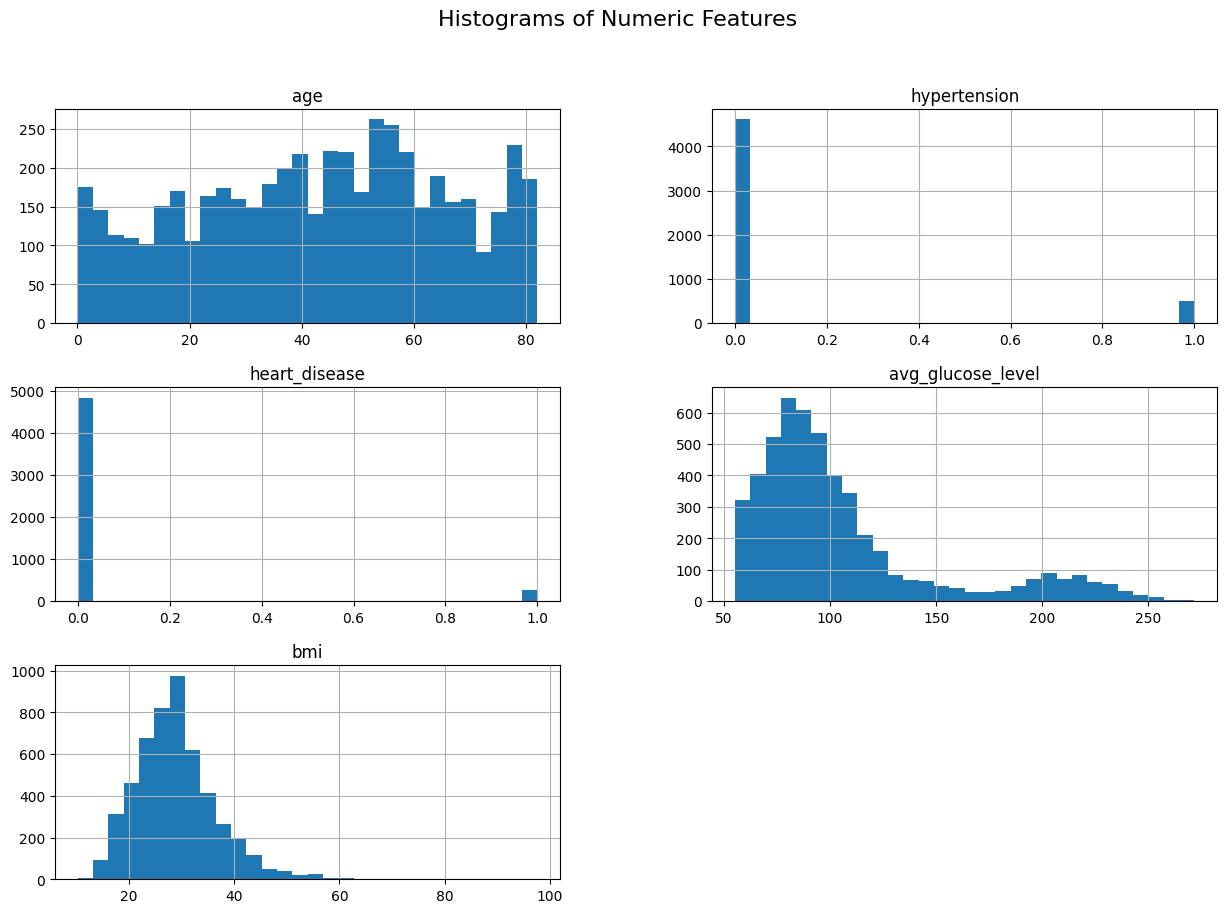

In [15]:
numeric_cols = ['age', 'hypertension', 'heart_disease',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status',]
data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

#### Plot density untuk melihat distribusi data

---




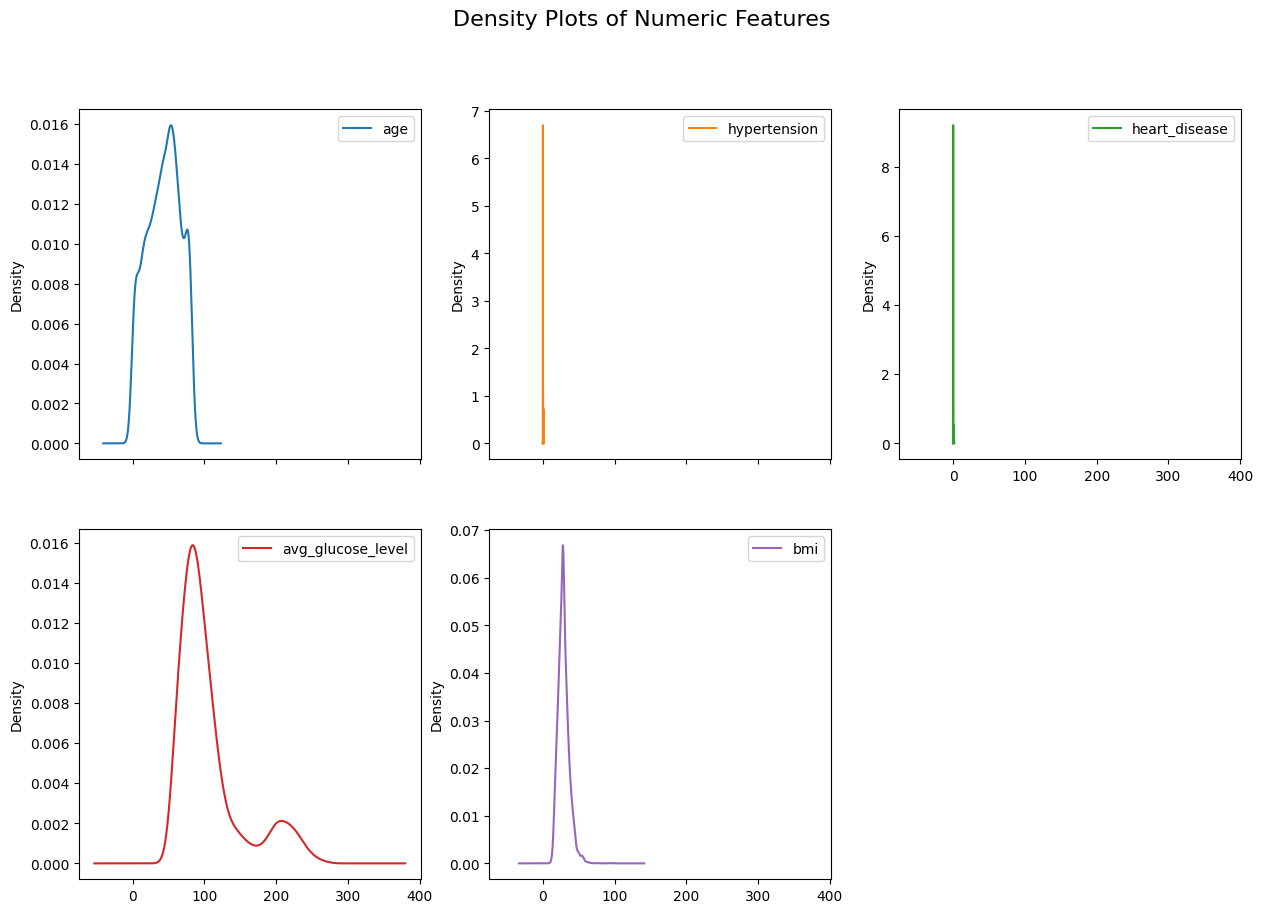

In [16]:
data[numeric_cols].plot(kind="density", subplots=True, layout=(2, 3), figsize=(15, 10))
plt.suptitle("Density Plots of Numeric Features", fontsize=16)
plt.show()


#### Missing Value Heatmap


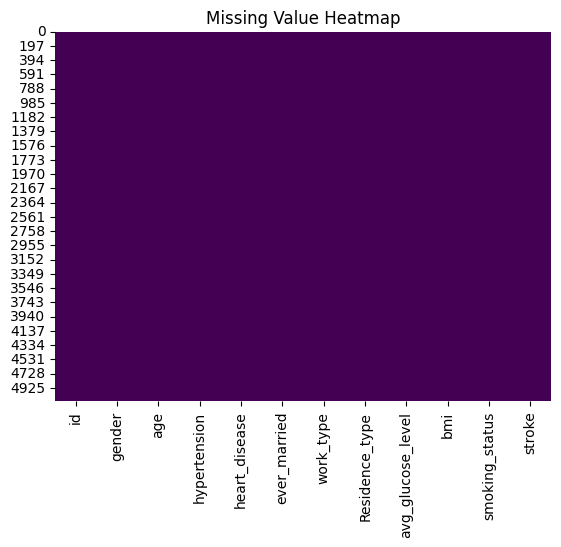

In [17]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

#### Deteksi Outlier Menggunakan Boxplot


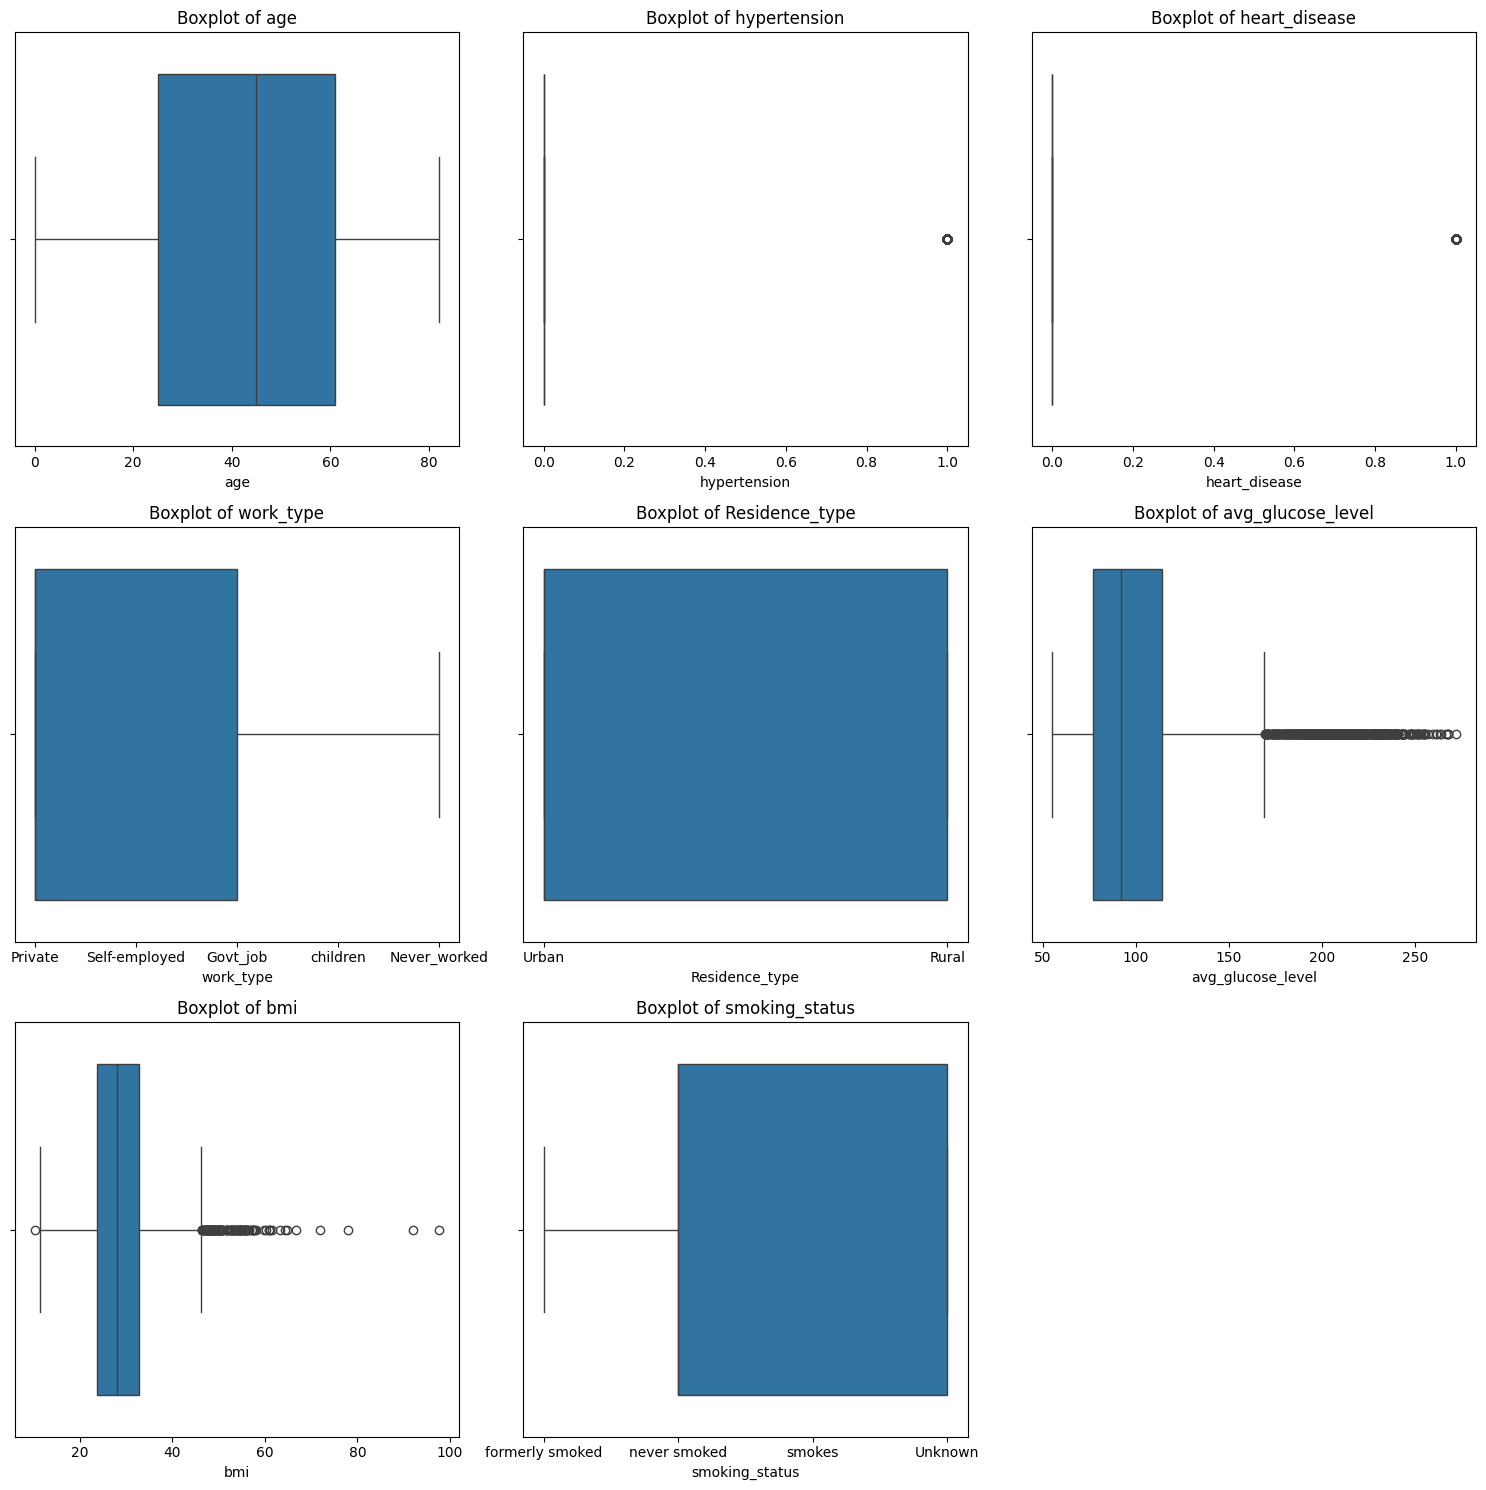

In [18]:
plt.figure(figsize=(15, 15)) # Adjusted figure size to accommodate more plots
for i, col in enumerate(numeric_cols):
    # Adjusted subplot layout to 3 rows and 3 columns
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

#### Visualisasi Data Kategorikal


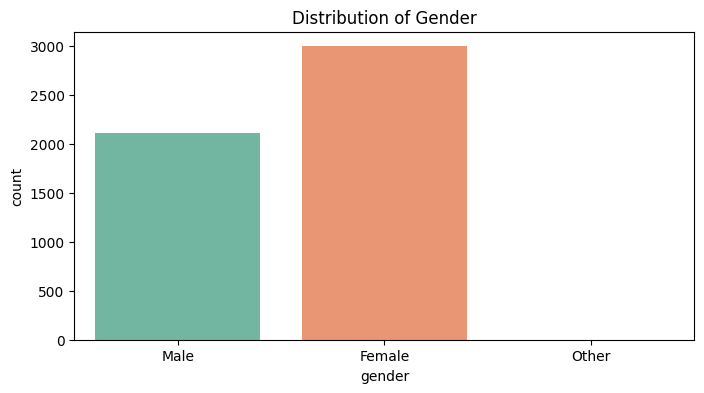

In [19]:
# Bar plot untuk kolom 'Gender'
plt.figure(figsize=(8, 4))
sns.countplot(x="gender", hue="gender", data=data, palette="Set2")
plt.title("Distribution of Gender")
plt.show()

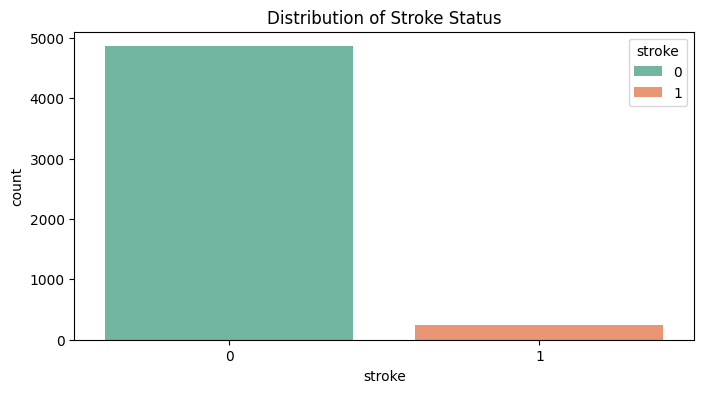

In [22]:
# Bar plot untuk kolom 'Stroke'
plt.figure(figsize=(8, 4))
sns.countplot(x="stroke", hue="stroke", data=data, palette="Set2")
plt.title("Distribution of Stroke Status")
plt.show()

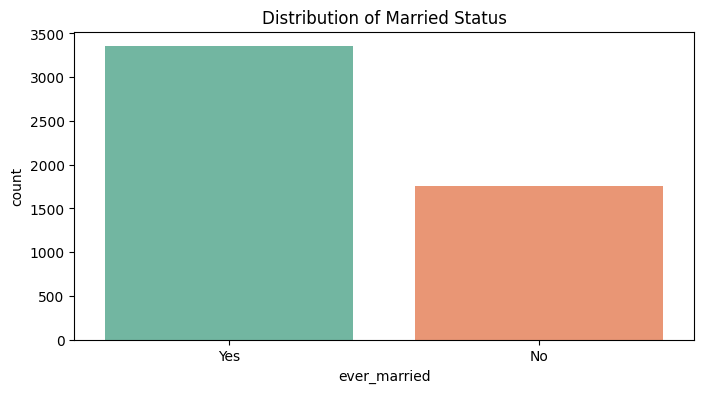

In [23]:
# Jika diperlukan, visualisasi untuk kolom 'ever_married'
plt.figure(figsize=(8, 4))
sns.countplot(x="ever_married", hue="ever_married", data=data, palette="Set2")
plt.title("Distribution of Married Status")
plt.show()

### Data Cleaning


In [24]:
data_clean = data.copy()

#### Deteksi dan Penanganan Outlier


In [25]:
# Definisikan fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# Tentukan kolom numerik yang ingin dicek outlier-nya
numeric_cols = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]

# Terapkan fungsi remove_outliers untuk tiap kolom numerik
for col in numeric_cols:
    data_clean = remove_outliers(data_clean, col)
    print(
        f"Setelah pembersihan outlier, data[{col}] memiliki {data_clean.shape[0]} baris."
    )

# Tampilkan statistik deskriptif setelah pembersihan outlier
print(data_clean.describe())


Setelah pembersihan outlier, data[age] memiliki 5110 baris.
Setelah pembersihan outlier, data[hypertension] memiliki 4612 baris.
Setelah pembersihan outlier, data[heart_disease] memiliki 4400 baris.
Setelah pembersihan outlier, data[avg_glucose_level] memiliki 3985 baris.
Setelah pembersihan outlier, data[bmi] memiliki 3897 baris.
                 id          age  hypertension  heart_disease  \
count   3897.000000  3897.000000        3897.0         3897.0   
mean   36520.891968    38.284701           0.0            0.0   
std    21128.282548    21.917049           0.0            0.0   
min       67.000000     0.080000           0.0            0.0   
25%    17762.000000    20.000000           0.0            0.0   
50%    36958.000000    38.000000           0.0            0.0   
75%    54579.000000    55.000000           0.0            0.0   
max    72940.000000    82.000000           0.0            0.0   

       avg_glucose_level          bmi       stroke  
count        3897.000000  38

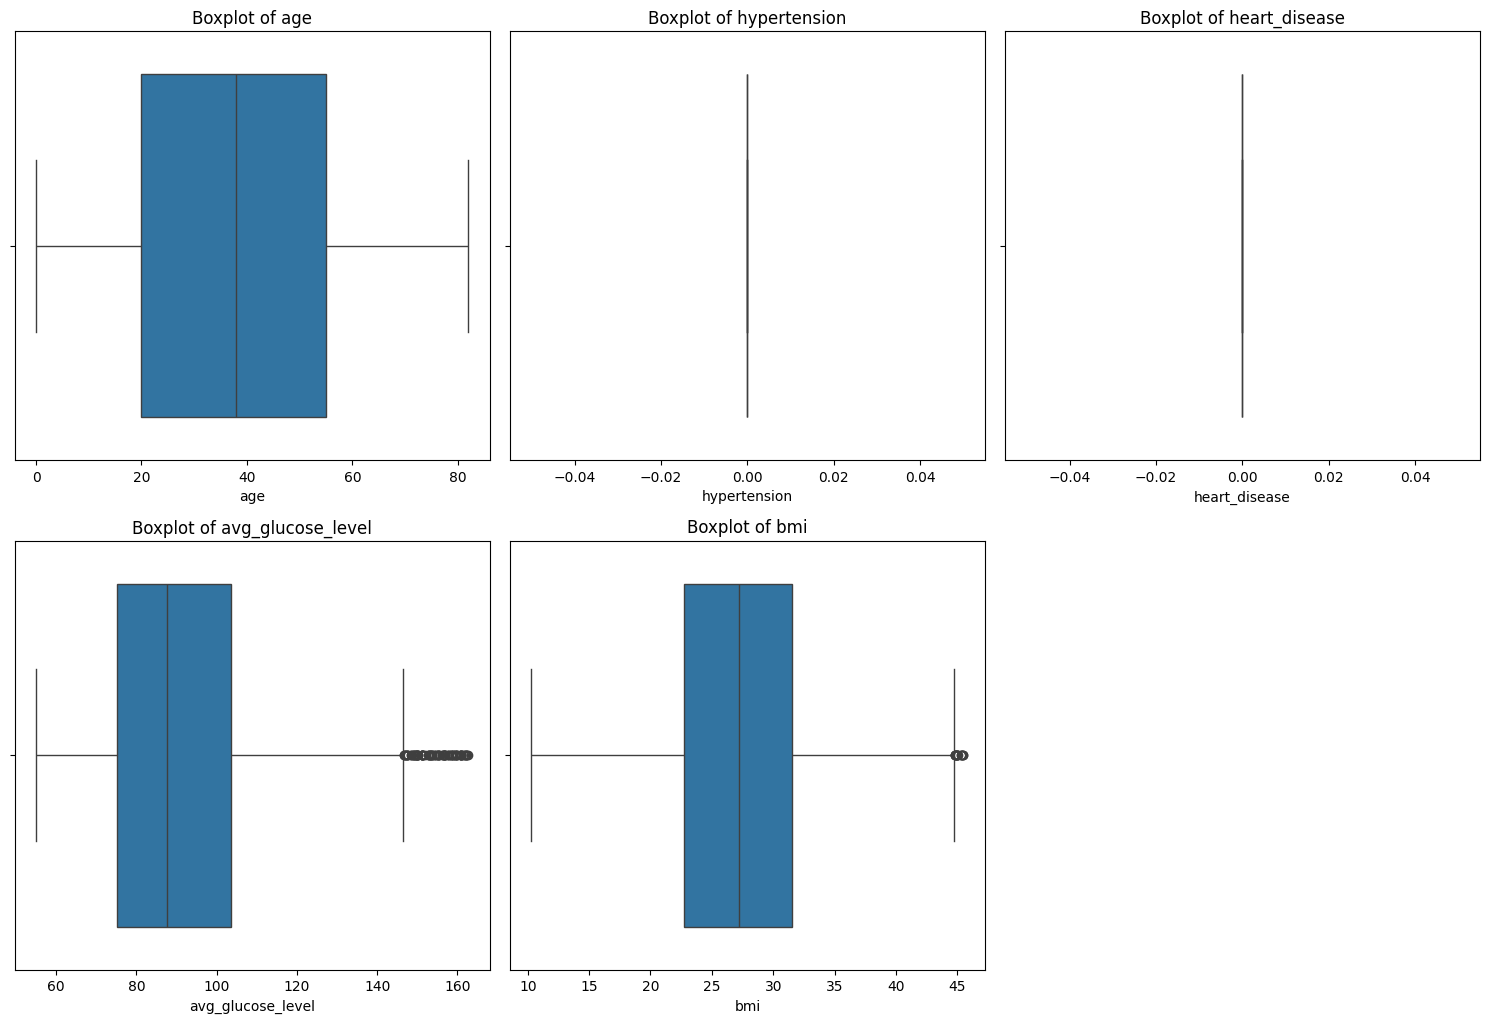

In [26]:
plt.figure(figsize=(15, 15)) # Adjusted figure size to accommodate more plots
for i, col in enumerate(numeric_cols):
    # Adjusted subplot layout to 3 rows and 3 columns
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data_clean[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [27]:
# Inisialisasi MinMaxScaler dengan rentang 0-1
scaler = MinMaxScaler(feature_range=(0.1, 0.9))

# Terapkan scaler pada kolom numerik
numeric_cols = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
data_clean[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])

# Tampilkan beberapa baris hasil scaling
print(data_clean[numeric_cols].head())


         age  hypertension  heart_disease  avg_glucose_level       bmi
7   0.773047           0.1            0.1           0.391970  0.384091
8   0.675391           0.1            0.1           0.256357  0.504545
9   0.860938           0.1            0.1           0.125651  0.415909
12  0.626563           0.1            0.1           0.467212  0.486364
18  0.685156           0.1            0.1           0.353532  0.725000


In [28]:
# Inisialisasi label encoder
le = LabelEncoder()

# Encode kolom 'Gender'
data_clean["gender"] = le.fit_transform(data_clean["gender"])
data["gender"] = le.fit_transform(data["gender"])
# Encode kolom 'Breastfeeding'
data_clean["ever_married"] = le.fit_transform(data_clean["ever_married"])
data["ever_married"] = le.fit_transform(data["ever_married"])
# Encode kolom 'Stunting'
data_clean["stroke"] = le.fit_transform(data_clean["stroke"])
data["stroke"] = le.fit_transform(data["stroke"])

# Tampilkan nilai unik setelah encoding
print("Unique values in Gender:", data_clean["gender"].unique())
print("Unique values in ever_married:", data_clean["ever_married"].unique())
print("Unique values in Stroke:", data_clean["stroke"].unique())

Unique values in Gender: [0 1 2]
Unique values in ever_married: [0 1]
Unique values in Stroke: [1 0]


In [29]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, RandomUnderSampler
import pandas as pd # Ensure pandas is imported

# Identify remaining categorical columns that are not yet numerical
categorical_cols_to_encode = ['work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding to the remaining categorical columns
data_clean = pd.get_dummies(data_clean, columns=categorical_cols_to_encode, drop_first=True)

# Pisahkan fitur dan label
X = data_clean.drop(columns=["stroke"])
y = data_clean["stroke"]

# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
nm = NearMiss()
rus = RandomUnderSampler(random_state=42, sampling_strategy="auto")
X_balanced, y_balanced = smote.fit_resample(X, y)

# buat dataframe dari hasil SMOTE untuk analisis correlation
data_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_balanced["stroke"] = y_balanced
# Tampilkan distribusi kelas setelah balancing
print("Distribusi kelas setelah balancing:")
print(pd.Series(y_balanced).value_counts())

Distribusi kelas setelah balancing:
stroke
1    3788
0    3788
Name: count, dtype: int64


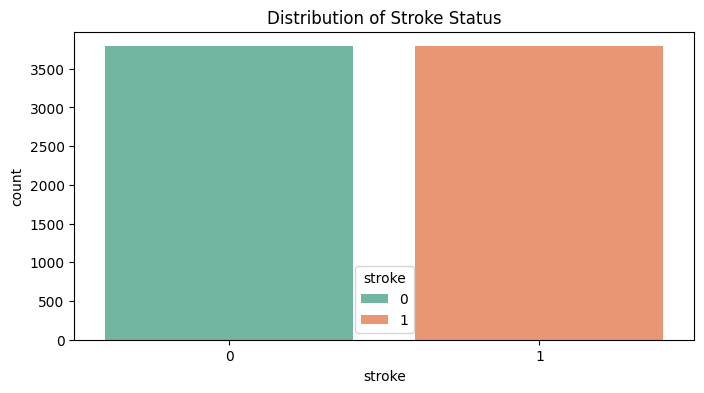

In [30]:
# Bar plot untuk kolom 'Stunting'
plt.figure(figsize=(8, 4))
sns.countplot(x="stroke", hue="stroke", data=data_balanced, palette="Set2")
plt.title("Distribution of Stroke Status")
plt.show()

In [31]:
# Inisialisasi MinMaxScaler dengan rentang 0-1
scaler = MinMaxScaler(feature_range=(0.1, 0.9))

# Terapkan scaler pada kolom numerik
data_balanced[numeric_cols] = scaler.fit_transform(data_balanced[numeric_cols])

# Tampilkan beberapa baris hasil scaling
print(data_balanced[numeric_cols].head())


        age  hypertension  heart_disease  avg_glucose_level       bmi
0  0.773047           0.1            0.1           0.391970  0.384091
1  0.675391           0.1            0.1           0.256357  0.504545
2  0.860938           0.1            0.1           0.125651  0.415909
3  0.626563           0.1            0.1           0.467212  0.486364
4  0.685156           0.1            0.1           0.353532  0.725000


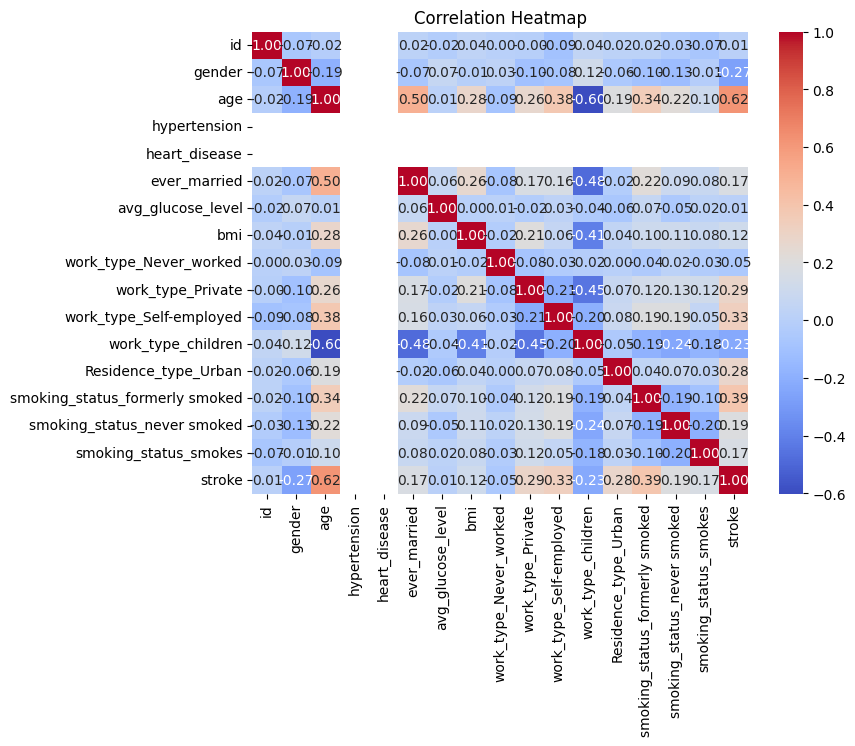

In [32]:
corr_matrix = data_balanced.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
X = data_balanced.drop(columns=["stroke"])
y = data_balanced["stroke"]
# Bagi data ke dalam training dan testing set, 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Tampilkan ukuran masing-masing set
print("Ukuran Training set:", X_train.shape)
print("Ukuran Testing set:", X_test.shape)

Ukuran Training set: (5303, 16)
Ukuran Testing set: (2273, 16)


In [34]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="distance")

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [36]:
# Melakukan prediksi pada data testing
y_pred = knn.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model KNN:")
print("Akurasi  :", accuracy)
print("Presisi  :", precision)
print("Recall   :", recall)
print("F1-Score :", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Hasil Evaluasi Model KNN:
Akurasi  : 0.6242850857897052
Presisi  : 0.6218697829716193
Recall   : 0.650087260034904
F1-Score : 0.6356655290102389

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      1127
           1       0.62      0.65      0.64      1146

    accuracy                           0.62      2273
   macro avg       0.62      0.62      0.62      2273
weighted avg       0.62      0.62      0.62      2273



Confusion Matrix (DataFrame):
                    Predicted: Non-stroke  Predicted: stroke
Actual: Non-stroke                    674                453
Actual: stroke                        401                745


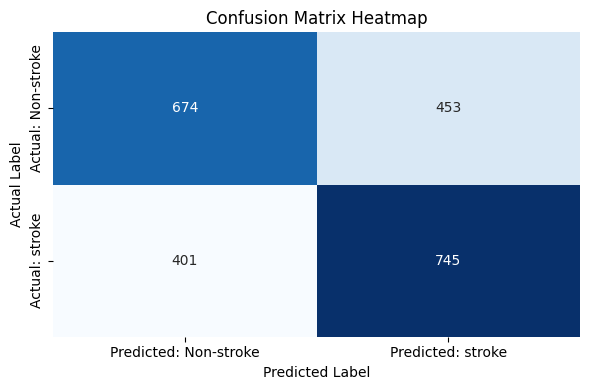

In [37]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat DataFrame confusion matrix untuk ditampilkan
cm_df = pd.DataFrame(
    cm,
    index=["Actual: Non-stroke", "Actual: stroke"],
    columns=["Predicted: Non-stroke", "Predicted: stroke"],
)

# Tampilkan confusion matrix sebagai DataFrame
print("Confusion Matrix (DataFrame):")
print(cm_df)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [38]:
# Buat parameter grid untuk GridSearch
param_grid = {
    "n_neighbors": range(3, 22, 2),  # Menggunakan nilai ganjil untuk n_neighbors
    "weights": ["uniform", "distance"],
    "metric": [
        "euclidean",
        "manhattan",
        "minkowski",
    ],  # Pilihan metrik, bisa ditambahkan opsi lain jika perlu
}

# Inisialisasi GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)

# Lakukan pencarian grid pada data training (menggunakan fitur yang sudah di-balancing dan feature engineered)
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik dan skor terbaik dari grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi pada data testing
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Evaluasi model terbaik
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Test Set Accuracy with Best Parameters:", accuracy_best)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Tampilkan confusion matrix dalam bentuk DataFrame
cm_best = confusion_matrix(y_test, y_pred_best)
cm_df_best = pd.DataFrame(
    cm_best,
    index=["Actual: Non-stroke", "Actual: stroke"],
    columns=["Predicted: Non-stroke", "Predicted: stroke"],
)
print("Confusion Matrix (Best Model):")
print(cm_df_best)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.6869635267547525
Test Set Accuracy with Best Parameters: 0.6775186977562693

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      1127
           1       0.66      0.74      0.70      1146

    accuracy                           0.68      2273
   macro avg       0.68      0.68      0.68      2273
weighted avg       0.68      0.68      0.68      2273

Confusion Matrix (Best Model):
                    Predicted: Non-stroke  Predicted: stroke
Actual: Non-stroke                    691                436
Actual: stroke                        297                849


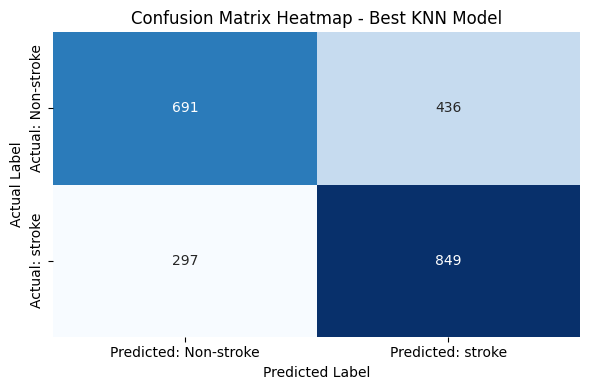

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap - Best KNN Model")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

Hasil Grid Search dalam bentuk tabel:


,params,mean_test_score,std_test_score,rank_test_score
0,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.643970,0.011654,51
1,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.623228,0.009484,59
2,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.660000,0.012004,35
3,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.634353,0.013256,57
4,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.667354,0.012148,32
5,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.640386,0.016241,55
6,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.675649,0.015066,27
7,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.643214,0.016318,53
8,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.676029,0.015422,22
9,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.647174,0.015265,49


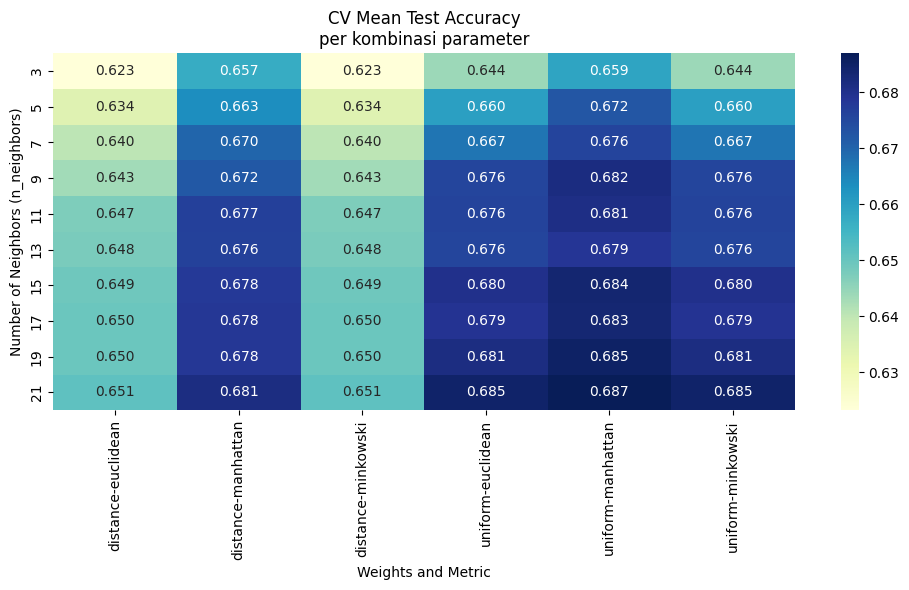

In [40]:
# Ambil hasil dari grid search cv (cv_results_)
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Hasil Grid Search dalam bentuk tabel:")
display(cv_results[["params", "mean_test_score", "std_test_score", "rank_test_score"]])

# Membuat pivot table untuk visualisasi
pivot_table = cv_results.pivot_table(
    index="param_n_neighbors",
    columns=["param_weights", "param_metric"],
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("CV Mean Test Accuracy\nper kombinasi parameter")
plt.xlabel("Weights and Metric")
plt.ylabel("Number of Neighbors (n_neighbors)")
plt.tight_layout()
plt.show()

Kolom split test scores: ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
Pivot Table (Highest Test Accuracy):
param_weights      distance                       uniform                    
param_metric      euclidean manhattan minkowski euclidean manhattan minkowski
param_n_neighbors                                                            
3                  0.635250  0.668238  0.635250  0.661640  0.671065  0.661640
5                  0.650330  0.677663  0.650330  0.673893  0.684260  0.673893
7                  0.661640  0.685203  0.661640  0.684260  0.693685  0.684260
9                  0.660697  0.688030  0.660697  0.693685  0.698398  0.693685
11                 0.664467  0.693685  0.664467  0.697455  0.703110  0.697455
13                 0.667295  0.694628  0.667295  0.692743  0.694628  0.692743
15                 0.668238  0.696513  0.668238  0.689915  0.694628  0.689915
17                 0.664467  0.695570  0.664467  0.6

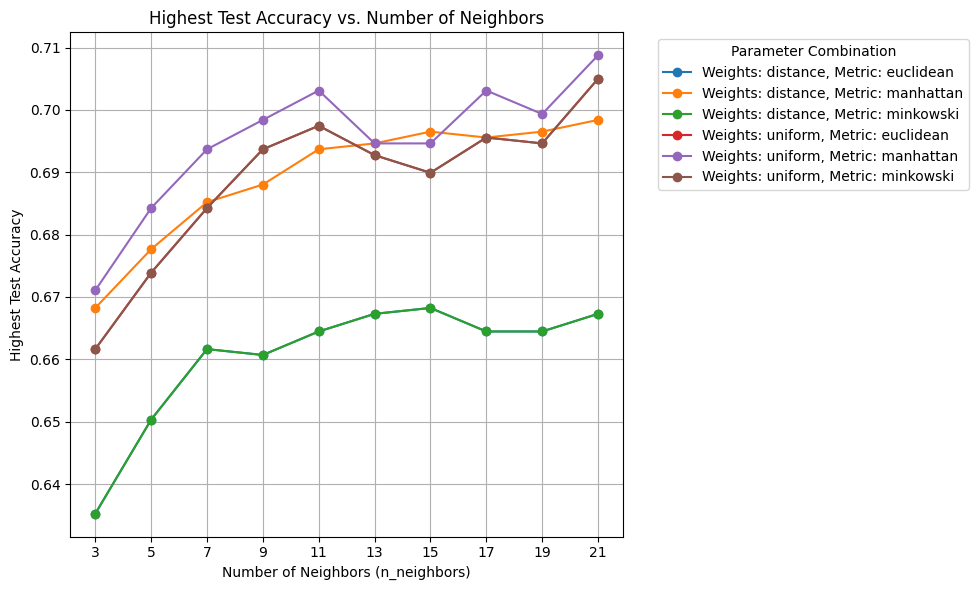

In [41]:
# Ambil cv_results dari grid_search
cv_results = pd.DataFrame(grid_search.cv_results_)

# Tampilkan kolom-kolom split test score (misalnya, 'split0_test_score' hingga 'split4_test_score')
score_cols = [
    col for col in cv_results.columns if "split" in col and "test_score" in col
]
print("Kolom split test scores:", score_cols)

# Hitung highest test accuracy untuk setiap iterasi (baris) dengan mengambil nilai maksimum di antara split test scores
cv_results["max_test_score"] = cv_results[score_cols].max(axis=1)

# Buat pivot table berdasarkan parameter n_neighbors, weights, dan metric menggunakan 'max_test_score'
pivot_table_line_max = cv_results.pivot_table(
    index="param_n_neighbors",
    columns=["param_weights", "param_metric"],
    values="max_test_score",
)

# Tampilkan pivot table untuk referensi
print("Pivot Table (Highest Test Accuracy):")
print(pivot_table_line_max)

# Buat plot line untuk setiap kombinasi (weights, metric) berdasarkan highest test accuracy
plt.figure(figsize=(10, 6))
for col in pivot_table_line_max.columns:
    plt.plot(
        pivot_table_line_max.index,
        pivot_table_line_max[col],
        marker="o",
        label=f"Weights: {col[0]}, Metric: {col[1]}",
    )

plt.title("Highest Test Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Highest Test Accuracy")

plt.xticks(ticks=range(3, 22, 2))

plt.legend(title="Parameter Combination", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
